*Brenda Villaseñor Feixas*

**Proyecto**


Frecuencia cardiaca

Capítulo 6, libro: Differential Equations and Mathematical Biology

Las ecuaciones que describen este sistema es:
$$\epsilon\frac{dx}{dt}=-(x³-Tx+b)$$
$$\frac{db}{dt}=(x-x_0)+(x_0-x_1)u$$



i) Librerías a utilizar

In [ ]:
#Librerías a utilizar
import matplotlib.pylab as gr
import sympy as sm
import numpy as np

ii) Definición del método RK4

In [ ]:
#Creamos una función para el método de Runge-Kutta de cuarto orden
def RK4(ic,f,p):
    t = np.arange(p['t_i'],p['t_f'],p['h'])
    XX = np.zeros((len(t),len(ic)))

    XX[0] = ic
    for i in range(1,len(t)):
        k1 = f(XX[i-1])*p['h']
        k2 = f(XX[i-1]+k1/2)*p['h']
        k3 = f(XX[i-1]+k2/2)*p['h']
        k4 = f(XX[i-1]+k3)*p['h']
        XX[i] = XX[i-1]+(k1+2*k2+2*k3+k4)/6
    return XX.transpose()

iii) Diccionario de variables

In [ ]:
#Definimos el diccionario de las variables
p = {"h":0.01,"epsilon":0.5,"x_0": 1, "x_1":0, "t_i":0, "t_f":100,"u":1,"T":1}


iv) Definición de la función de la Frecuencia Cardiaca

In [ ]:
#Definimos la funcion para el bioreactor
def FC(U):
    x,b = U
    db = (x-p['x_0'])+(p['x_0']-p['x_1'])*p['u']
    dx = -(x**3-p['T']*x+b)/p['epsilon']
    return np.array([dx,db])

v) Graficar solución vs tiempo para una condición inicial

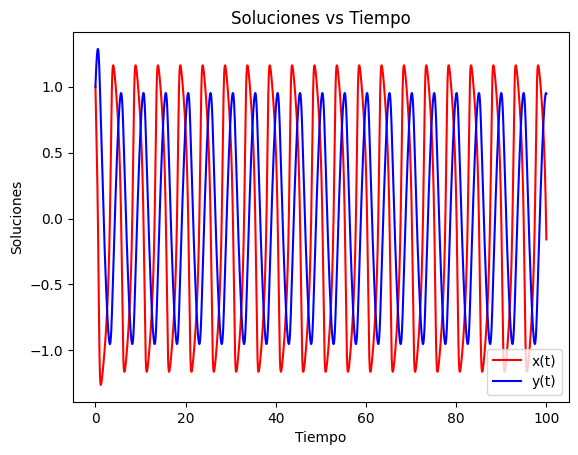

In [ ]:
#Solucion del sistema para la ci=[5,6]
orbit = RK4([1.0,1.0],FC,p)
xorbit, yorbit = orbit
t = np.arange(p['t_i'],p['t_f'],p['h'])

#Graficamos la solución para bacterias y glucosa contra el tiempo
gr.plot(t,xorbit,'r', label='x(t)')
gr.plot(t, yorbit,'b', label='y(t)')
gr.title("Soluciones vs Tiempo")
gr.xlabel("Tiempo")
gr.ylabel("Soluciones")
gr.legend()
gr.show()

Se puede observar un comportamiento oscilatorio, como lo es el pulso cardiaco. Esta es una aproximación aceptable puesto que el mecanismo de contracción-eyección del corazón se lleva a cabo mediante un potencial de acción ventricular, que tiene una forma gráfica como la carga y descarga de un capacitor, cuyo pico superior es el potencial al que se encuentra la membrana en un estado excitado y el mínimo de la gráfica es el potencial al que se encuentra la membrana en estado basal.

In [ ]:
#Existen dos
#NULLCLINA DE X
def X_null(Y):
    CX = []
    for i in Y:
        CX.append(-i**3+p['T']*i)
    return CX



#NULlCLINA DE B
def B_null(X):
    CY = []
    for i in X:
        CY.append(p['x_0']+(p['x_1']-p['x_0'])*p['u'])
    return CY

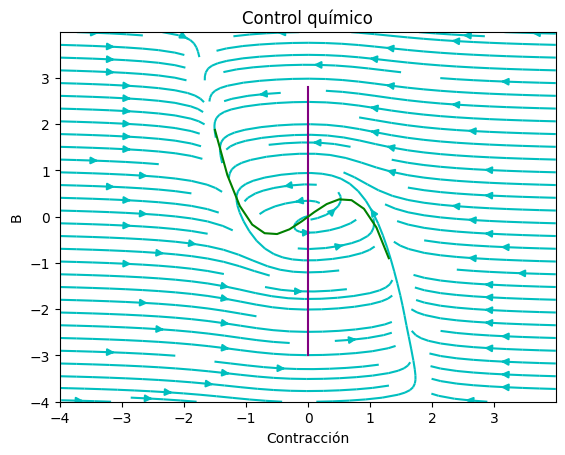

In [ ]:
#Definición de los intervalos de las nulclinas
X_int = np.arange(-3,3,0.2)
B_int = np.arange(-1.5,1.5,0.2)

#Se crea la malla para el campo vectorial
x = np.arange(-4,4,0.01)
b = np.arange(-4,4,0.01)
X,B = np.meshgrid(x,b)

#Escribimos nuevamente las ecuaciones diferenciales de nuestro sistema para
#boquejar el campo vectorial
bb = (X-p['x_0'])+(p['x_0']-p['x_1'])*p['u']
xx = -(X**3-p['T']*X+B)/p['epsilon']

#Bosquejamos el campo vectorial
gr.title('Control químico')
gr.xlabel('Contracción')
gr.ylabel('B')
#Se trazan las líneas del campo
gr.streamplot(X,B,xx,bb,color='c')
#Se grafican las ceroclinas válidas para el sistema biológico
gr.plot(B_null(X_int),X_int,'purple',label='Ceroclina de B')
gr.plot(B_int,X_null(B_int),'g',label='Ceroclina de X')


vi) Gráfica del plano fase. Con CINCO curvas soluciones.

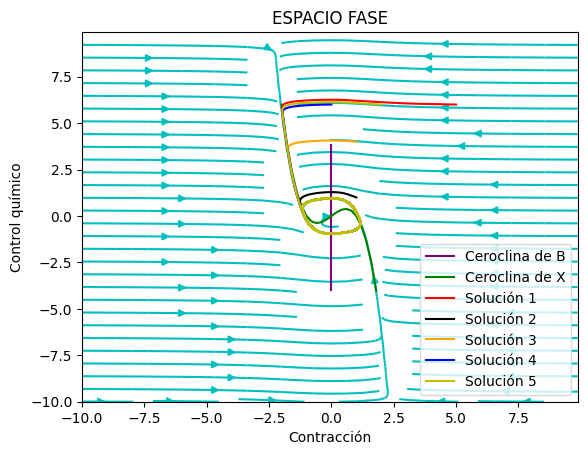

In [ ]:
#Definición de los intervalos de las nulclinas
X_int = np.arange(-4,4,0.2)
B_int = np.arange(-2,2,0.2)

#Se crea la malla para el campo vectorial
x = np.arange(-10,10,0.1)
b = np.arange(-10,10,0.1)
X,B = np.meshgrid(x,b)

#Escribimos nuevamente las ecuaciones diferenciales de nuestro sistema para
#boquejar el campo vectorial
bb = (X-p['x_0'])+(p['x_0']-p['x_1'])*p['u']
xx = -(X**3-p['T']*X+B)/p['epsilon']

#Bosquejamos el campo vectorial
gr.title('ESPACIO FASE')
gr.xlabel('Contracción')
gr.ylabel('Control químico')
#Se trazan las líneas del campo
gr.streamplot(X,B,xx,bb,color='c')
#Se grafican las ceroclinas válidas para el sistema biológico
gr.plot(B_null(X_int),X_int,'purple',label='Ceroclina de B')
gr.plot(B_int,X_null(B_int),'g',label='Ceroclina de X')



#Definimos 5 soluciones con 5 condiciones iniciales distintas
orbit1 = RK4([5.0,6.0],FC,p)
orbit2 = RK4([1.0,1.0],FC,p)
orbit3 = RK4([1.0,4.0],FC,p)
orbit4 = RK4([0.0,6.0],FC,p)
orbit5 = RK4([2.0,6.0],FC,p)
Gorbit1, Borbit1 = orbit1
Gorbit2, Borbit2 = orbit2
Gorbit3, Borbit3 = orbit3
Gorbit4, Borbit4 = orbit4
Gorbit5, Borbit5 = orbit5
gr.plot(Gorbit1,Borbit1,'r',label='Solución 1')
gr.plot(Gorbit2,Borbit2,'k',label='Solución 2')
gr.plot(Gorbit3,Borbit3,'orange',label='Solución 3')
gr.plot(Gorbit4,Borbit4,'b',label='Solución 4')
gr.plot(Gorbit5,Borbit5,'y',label='Solución 5')
gr.legend(loc="lower right")


Se puede observar que existe una región de ciclo límite en la cual trayectorias cercanas tienden a esta región. Esto indica que dada cualquier condición inicial, el sistema tenderá a comportarse de manera oscilatoria amortiguada (como se vió previamente), dado que el estado homeostático requiere este comportamiento para el funcionamiento adecuado del corazón. De no existir una tendencia a este comportamiento, no habría un flujo armónico de la sangre oxigenada-desoxigenada y de nutrientes que permitieran que el cuerpo continuara con sus procesos básicos para la vida.

vii) Análisis cualitativo con sympy que indique: nulclinas, puntos de equilibrio, clasificación del los puntos de equilibrio, gráfica del plano fase con las nulclinas y campo vectorial .

In [ ]:
#Vamos a definir las ecuaciones en lenguaje simbólico
x,b = sm.symbols('x,b', negative=False)
db = (x-p['x_0'])+(p['x_0']-p['x_1'])*p['u']
dx = -(x**3-p['T']*x+b)/p['epsilon']

#Obtenemos las ceroclinas con Sympy
xEqual = sm.Eq(dx,0)
bEqual = sm.Eq(db,0)

In [ ]:
print('Nulclina de x es:', xEqual)
print('Nulclina de b es:', bEqual)

Nulclina de x es: Eq(-2.0*b - 2.0*x**3 + 2.0*x, 0)
Nulclina de b es: Eq(x, 0)


In [ ]:
#Obtenemos los puntos de equilibrio
PE = sm.solve((xEqual,bEqual),x,b)
print('Los puntos de equilibrio son:')
print(PE)

Los puntos de equilibrio son:
[(0.0, 0.0)]


In [ ]:
#importamos las librerías para clasificar los puntos de equilibrio
import matplotlib.patches as mpatches
markercolor = []
facecolor = []

In [ ]:
#Escribimos la definición de la Clasificación de los puntos de equilibrio (creada por Melissa Ponce)
def Clasificador(Equilibrio):
    #Escribimos las ecuaciones en forma matricial y calculamos su jacobiana
    eqMat = sm.Matrix([ dx, db])
    Mat = sm.Matrix([ x, b])
    jacMat = eqMat.jacobian(Mat)
    #print('Matriz Jacobiana %s' % jacMat)
    #print('--------------------------------------------------------')

    # Evaluamos en cada punto de eq. y calculamos valores propios
    #----------------------------------------------------------------------------
    #    Clasificador
    #-------------------------------------------------------------------------------------------------


    eqMat = jacMat.subs([(x, Equilibrio[0]),(b, Equilibrio[1])])#Substituye los puntos de equilibrio en la matriz jacobiana
    #print("Substitucion en la matriz jacobiana",eqMat)
    #print('--------------------------------------------------------')
    eige = list(eqMat.eigenvals()) #calcula los eigenvalores del sistema
    #print('valores propios:')
    #print(eige)
    #print('')
    traz = eqMat.trace() #calcula la traza
    deter = eqMat.det() #calcula el determinante
    Delta = traz**2 - 4*deter #factor delta para la clasificación

    if len(eige) == 1: #si solo tenemos un eigenvalor, significa que es degenerado
        print("El punto fijo (%s,%s) tiene un eigenvalor %s degenerado de multiplicidad 2" %(Equilibrio[0], Equilibrio[1], eige))
    else:
        l1 = complex(eige[0])# convierte en complejos para mayor generalidad
        l2 = complex(eige[1])
        print ('Los valores propios para el punto fijo (%s, %s) son %s y %s, además' %(Equilibrio[0], Equilibrio[1], l1, l2))

    if traz == 0:#Clasifcacion de sistemas
        if deter > 0:
            print('El Equilibrio es un centro.')
            marker = 'y.'
            face = 'black'
            markercolor.append(marker)
            facecolor.append(face)
        elif deter < 0:
            print('El Equilibrio es un saddle node.')
            marker = 'r.'
            face = 'black'
            markercolor.append(marker)
            facecolor.append(face)
        else:
            print('El Equilibrio es una serie de puntos en el eje x.')
            marker = 'yv'
            face = 'black'
            markercolor.append(marker)
            facecolor.append(face)
    elif traz < 0:
        if deter >0:
            if Delta < 0:
                print('El Equilibrio es una espiral estable.')
                marker = 'ko'
                face = 'black'
                markercolor.append(marker)
                facecolor.append(face)
            elif Delta >0:
                print('El Equilibrio es un nodo estable.')
                marker = 'bo'
                face = 'black'
                markercolor.append(marker)
                facecolor.append(face)
            else:
                print('El Equilibrio es un nodo degenerado estable')
                marker = 'bv'
                face = 'black'
                markercolor.append(marker)
                facecolor.append(face)
        elif deter < 0:
            print('El Equilibrio es un Saddle Node')
            marker = 'r.'
            face = 'black'
            markercolor.append(marker)
            facecolor.append(face)
        else:
            print('El Equilibrio es una serie de puntos estables en el eje x.')
            marker = 'yv'
            face = 'black'
            markercolor.append(marker)
            facecolor.append(face)
    else:
        if deter > 0:
            if Delta <0:
                print('El Equilibrio es una espiral inestable.')
                marker = 'bo'
                face = 'none'
                markercolor.append(marker)
                facecolor.append(face)
            elif Delta >0:
                print('El Equilibrio es un nodo inestable.')
                marker = 'ko'
                face = 'none'
                markercolor.append(marker)
                facecolor.append(face)
            else:
                print('El Equilibrio es un nodo degenerado inestable.')
                marker = 'bv'
                face = 'none'
                markercolor.append(marker)
                facecolor.append(face)
        elif deter < 0:
            print('El Equilibrio es un Saddle Node')
            marker = 'r.'
            face = 'black'
            markercolor.append(marker)
            facecolor.append(face)
        else:
            print('El Equilibrio es una serie de puntos estables en el eje x.')
            marker = 'yv'
            face = 'black'
            markercolor.append(marker)
            facecolor.append(face)
    return

In [ ]:
print(Clasificador(PE[0]))

Los valores propios para el punto fijo (0.0, 0.0) son (1-1j) y (1+1j), además
El Equilibrio es una espiral inestable.
None


##Variación de los parámetros

In [ ]:
import matplotlib.patches as mpatches

p = {"h":0.01,"epsilon":0.5,"x_0": 0.01, "x_1":0, "t_i":0, "t_f":100,"u":1,"T":1}

#Las variables que pueden variar son
#u = {0,1}
#T
#x_1

Los valores propios para el punto fijo (0.0, 0.0) son (-19.899494936611664+0j) y (-0.10050506338833466+0j), además
El Equilibrio es un nodo estable.
-10.0
Los valores propios para el punto fijo (0.0, 0.0) son (-19.49742233792053+0j) y (-0.10257766207947401+0j), además
El Equilibrio es un nodo estable.
-9.8
Los valores propios para el punto fijo (0.0, 0.0) son (-19.09526197637538+0j) y (-0.10473802362462459+0j), además
El Equilibrio es un nodo estable.
-9.600000000000001
Los valores propios para el punto fijo (0.0, 0.0) son (-18.69300812439116+0j) y (-0.10699187560884565+0j), además
El Equilibrio es un nodo estable.
-9.400000000000002
Los valores propios para el punto fijo (0.0, 0.0) son (-18.290654541890817+0j) y (-0.10934545810919066+0j), además
El Equilibrio es un nodo estable.
-9.200000000000003
Los valores propios para el punto fijo (0.0, 0.0) son (-17.888194417315596+0j) y (-0.11180558268441111+0j), además
El Equilibrio es un nodo estable.
-9.000000000000004
Los valores propios pa

Text(0.5, 1.0, 'Diagrama de bifurcacion para el parámetro $T$')

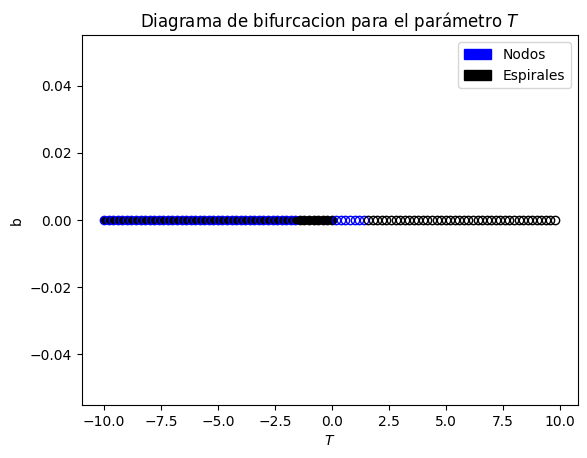

In [ ]:
markercolor = []
facecolor = []
gr.figure()
m_rango = np.arange(-10,10,0.2)

for i in range(len(m_rango)):
    p["T"]= m_rango[i]

    x,b = sm.symbols('x,b', negative=False)
    db = (x-p['x_0'])+(p['x_0']-p['x_1'])*p['u']
    dx = -(x**3-p['T']*x+b)/p['epsilon']

    #Obtenemos las ceroclinas con Sympy
    xEqual = sm.Eq(dx,0)
    bEqual = sm.Eq(db,0)

    equilibrio = sm.solve( (xEqual, bEqual), x, b)
    Clasificador(equilibrio[0])
    print(m_rango[i])
    gr.plot(m_rango[i],equilibrio[0][0],markercolor[i],markerfacecolor=facecolor[i])

blue_patch = mpatches.Patch(color='blue', label='Nodos')
black_patch = mpatches.Patch(color='black', label='Espirales')
gr.legend(handles=[blue_patch,black_patch])
gr.xlabel('$T$')
gr.ylabel('b')
gr.title('Diagrama de bifurcacion para el parámetro $T$')

In [ ]:
p = {"h":0.01,"epsilon":0.5,"x_0": 0.01, "x_1":0, "t_i":0, "t_f":100,"u":1,"T":1}

Los valores propios para el punto fijo (0.0, 0.0) son (1-1j) y (1+1j), además
El Equilibrio es una espiral inestable.
0.0
Los valores propios para el punto fijo (0.0100000000000000, 0.00999900000000000) son (0.9997-1.0002999100269878j) y (0.9997+1.0002999100269878j), además
El Equilibrio es una espiral inestable.
0.01
Los valores propios para el punto fijo (0.0200000000000000, 0.0199920000000000) son (0.9988-1.0011985617248957j) y (0.9988+1.0011985617248957j), además
El Equilibrio es una espiral inestable.
0.02
Los valores propios para el punto fijo (0.0300000000000000, 0.0299730000000000) son (0.9973-1.002692729603641j) y (0.9973+1.002692729603641j), además
El Equilibrio es una espiral inestable.
0.03
Los valores propios para el punto fijo (0.0400000000000000, 0.0399360000000000) son (0.9952-1.0047770698020533j) y (0.9952+1.0047770698020533j), además
El Equilibrio es una espiral inestable.
0.04
Los valores propios para el punto fijo (0.0500000000000000, 0.0498750000000000) son (0.9925

Text(0.5, 1.0, 'Diagrama de bifurcacion para el parámetro $x_1$')

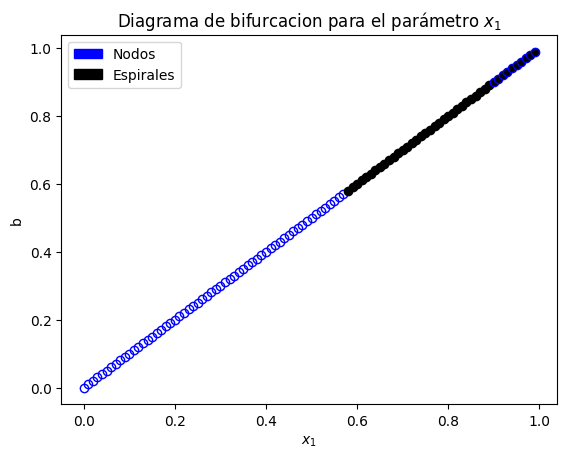

In [ ]:
markercolor = []
facecolor = []
gr.figure()
m_rango = np.arange(0,1,0.01)

for i in range(len(m_rango)):
    p["x_1"]= m_rango[i]

    x,b = sm.symbols('x,b', negative=False)
    db = (x-p['x_0'])+(p['x_0']-p['x_1'])*p['u']
    dx = -(x**3-p['T']*x+b)/p['epsilon']

    #Obtenemos las ceroclinas con Sympy
    xEqual = sm.Eq(dx,0)
    bEqual = sm.Eq(db,0)

    equilibrio = sm.solve( (xEqual, bEqual), x, b)
    Clasificador(equilibrio[0])
    print(m_rango[i])
    gr.plot(m_rango[i],equilibrio[0][0],markercolor[i],markerfacecolor=facecolor[i])

blue_patch = mpatches.Patch(color='blue', label='Nodos')
black_patch = mpatches.Patch(color='black', label='Espirales')
gr.legend(handles=[blue_patch,black_patch])
gr.xlabel('$x_1$')
gr.ylabel('b')
gr.title('Diagrama de bifurcacion para el parámetro $x_1$')

In [ ]:
p = {"h":0.01,"epsilon":0.5,"x_0": 0.01, "x_1":0, "t_i":0, "t_f":100,"u":1,"T":1}

Los valores propios para el punto fijo (0.0100000000000000, 0.00999900000000000) son (0.9997-1.0002999100269878j) y (0.9997+1.0002999100269878j), además
El Equilibrio es una espiral inestable.
0
Los valores propios para el punto fijo (0.0, 0.0) son (1-1j) y (1+1j), además
El Equilibrio es una espiral inestable.
1


Text(0.5, 1.0, 'Diagrama de bifurcacion para el parámetro $u$')

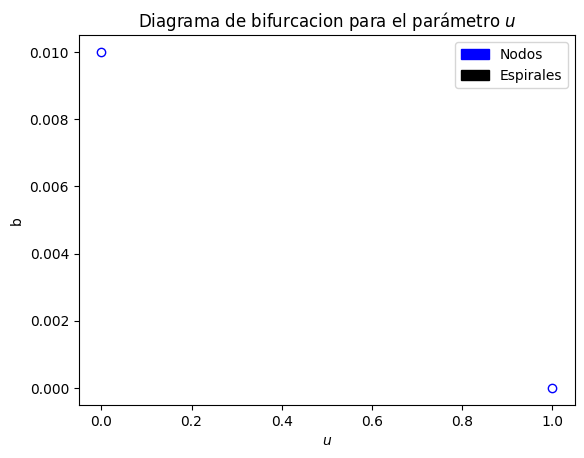

In [ ]:
markercolor = []
facecolor = []
gr.figure()
m_rango = np.arange(0,2,1)

for i in range(len(m_rango)):
    p["u"]= m_rango[i]

    x,b = sm.symbols('x,b', negative=False)
    db = (x-p['x_0'])+(p['x_0']-p['x_1'])*p['u']
    dx = -(x**3-p['T']*x+b)/p['epsilon']

    #Obtenemos las ceroclinas con Sympy
    xEqual = sm.Eq(dx,0)
    bEqual = sm.Eq(db,0)

    equilibrio = sm.solve( (xEqual, bEqual), x, b)
    Clasificador(equilibrio[0])
    print(m_rango[i])
    gr.plot(m_rango[i],equilibrio[0][0],markercolor[i],markerfacecolor=facecolor[i])

blue_patch = mpatches.Patch(color='blue', label='Nodos')
black_patch = mpatches.Patch(color='black', label='Espirales')
gr.legend(handles=[blue_patch,black_patch])
gr.xlabel('$u$')
gr.ylabel('b')
gr.title('Diagrama de bifurcacion para el parámetro $u$')

#Volumen sistólico

La ecuación a modelar es $$\frac{dV}{dt} = \frac{P(t)}{E} = \frac{1}{V(t)E}$$

In [ ]:
#Librerías a utilizar
import matplotlib.pylab as gr
import sympy as sm
import numpy as np

In [ ]:
#Definición de los parámetros
p = {"h":0.01,"E":0.5,"t_i":0, "t_f":100}

Text(0.5, 1.0, 'Solución del volumen sistólico en el tiempo')

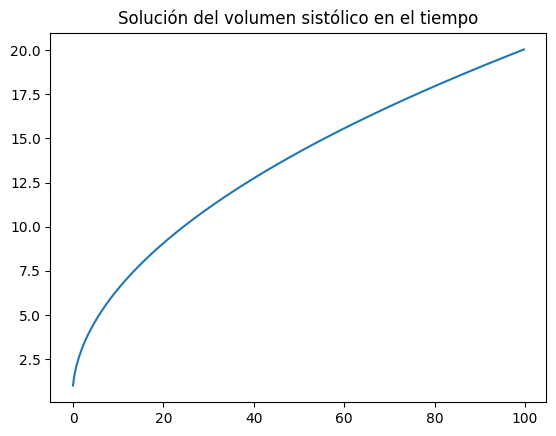

In [ ]:
#Definimos un arreglo para guardar los valores de la variable dependiente e inicializamos parámetro
V = np.zeros(400)
t_0=0
t_f=100
h=(t_f-t_0)/400

#Creamos un arreglo del mismo tamaño que la variable dependiente para evaluar los valore
t = np.arange(t_0,t_f,h)

#Agregamos condición inicial
V[0]=1

#Llenamos el arreglo con valores correspondientes a la función con el método de Euler
for i in range(0,400-1):
  V[i+1]=h/(p['E']*V[i])+V[i]

#graficamos la solucion
gr.plot(t,V)
gr.title('Solución del volumen sistólico en el tiempo')

<ipython-input-50-b0f13ac815b6>:6: RuntimeWarning: divide by zero encountered in divide
  vv = 1/(V*p['E'])


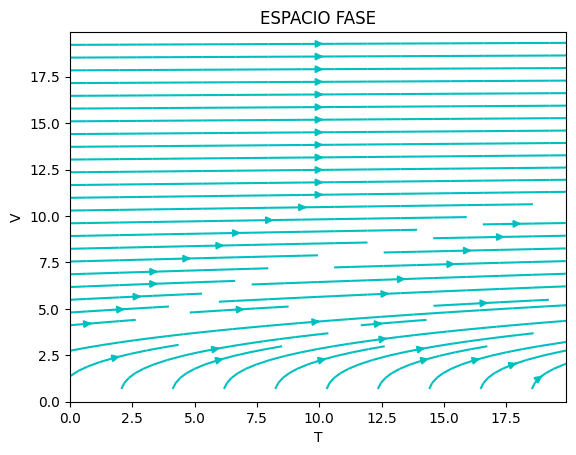

In [ ]:
#Se crea la malla para el campo vectorial
t = np.arange(0,20,0.1)
v = np.arange(0,20,0.1)
T,V = np.meshgrid(t,v)

vv = 1/(V*p['E'])
tt = V

#Bosquejamos el campo vectorial
gr.title('ESPACIO FASE')
gr.xlabel('T')
gr.ylabel('V')
gr.streamplot(T,V,tt,vv,color='c')